This is a test markdown fo version control using nbReview

In [ ]:
# this is a test cell for version control using nbReview

## Background

---

In this notebook, we are going to explore ways that one can apply Monte Carlo Simulation in predictiong project completion date and assess project risk. The workbook is divided into multiple scenarios, each one incorporating more uncertainty or elements than the one prior. We encourage you to create your own Jupytor notebook and follow along.**If you do not have Python or Jupyter Notebook installed yet, you could experiment with the virtual notebook by launching the virtual machine (Binder) above.**  On the other hand, the dowloadable Jupyter Notebook can be found [here](https://github.com/Master-of-Business-Analytics/Code_repository)

Monte Carlo Simulation is a great tool for business decision making under uncertainty, and it is well known in the Project Management domain. Instead of providing a simple predicted average project completion time, one could find a range of possible dates for completion. When you give an average completion prediction, there is a chance as high as 50% that one is going miss the deadline; however, no one likes to hear pessimistic estimates which would likely lead to the project bid won by a different team with a lower estimate (whether that is realistic or not). Monte Carlo Simulation in this case, could give you an idea of the possible distribution of the project completion time, which would then allow you to quote and make decisions that incorporates uncertainty.

Before we begin, please first download and import the following packages:

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Scenario One: Sequential Tasks

---

A construction project involves three tasks:

* Task 1 is likely to take three days (70% probability), but it might also be completed in two days (with 10% probability) or four days (20% probability)
* Task 2 has a 60% probability of taking six days to finish, a 20% probability each of being completed in five days or eight days
* Task 3 has an 80% probability of being completed in four days, 5% probability of being completed in three days and a 15% probability of being completed in five days.

Each task is dependent on the task before it, meaning that the three tasks must be executed in sequence. Your task is to provide information to the project manager concerning the expected completion time of the project and possible delays.

One simple method is to calculate the expected completion date of each task and then sumthem up, which would lead to the following:

\begin{equation}
\begin{split}
E\,[Project\:Completion\:Time] & = \sum_{n=1}^{3} E\,[Task_{n}\:Completion\:Time]\\
& = (0.7 \cdot 3 + 0.1 \cdot 2 + 0.2 \cdot 4) + (0.6 \cdot 6 + 0.2 \cdot 5 + 0.2 \cdot 8) + (0.8 \cdot 4 + 0.05 \cdot 3 + 0.15 \cdot 5)\\
& = 3.1 + 6.2 + 4\\
& = 13.3\:(days)
\end{split}
\end{equation}

However, without getting in too much detail, there is a fair chance that the actual completion time of the project is shorter or longer than 13.3 days, and it would be helpful to know the probability of different project completion time. Simple scenarios like this might be easy to solve with mathematical equations (learn more about discrete random variables [here](https://www.khanacademy.org/math/ap-statistics/random-variables-ap/discrete-random-variables/v/valid-discrete-probability-distribution-examples)), but real life situations are often much more complex. Therefore, Monte Carlo Simulation would be very useful in the sense that one could simulate the scenario without getting deep into the calculations. Simulated results also allow you to visualize the different instances and look at the actual distribution of those examples.

Let's start with simulating one instance of task 1:

In [49]:
t1_comp = [3, 2, 4] # the possible completion time for task 1
t1_prob = [0.7, 0.1, 0.2] # the probability of each completion time for task 1

t1_time = np.random.choice(t1_comp, 1, p=t1_prob) # the second argument means that we only need one instance

print(t1_time)

[3]


Now that you know how to simulate the completion for one task, we can also do the same for the other two tasks:

In [3]:
t2_comp = [6, 5, 8]
t2_prob = [0.6, 0.2, 0.2]

t2_time = np.random.choice(t2_comp, 1, p=t2_prob)

t3_comp = [4, 3, 5]
t3_prob = [0.8, 0.05, 0.15]

t3_time = np.random.choice(t3_comp, 1, p=t3_prob)

print(t2_time)
print(t3_time)

[6]
[4]


And now if we sum them up:

In [4]:
proj_time = t1_time + t2_time + t3_time

print(proj_time)

[13]


Note that every time you run the above code chunks, there would be a different project completion time; the essence of Monte Carlo Simulation is that we could record all those completion time and visualize their distribution. Thus, we can go ahead and simulate the above scenario a large number of times, let's say 1000 for now. 

Note that it is always a good habit to record the intermediate steps of your simulation so that you can go back to inspect and validatee your simulation. It is also a goo idea to define the number of replications as a variable so that in the future if we want to change it we don't need to go through the entire document to look for every instance of it.

In [5]:
t1_record = [] # Initiate empty lists to record the competion time
t2_record = []
t3_record = []

proj_record = []

t1_comp = [3, 2, 4]
t1_prob = [0.7, 0.1, 0.2]

t2_comp = [6, 5, 8]
t2_prob = [0.6, 0.2, 0.2]

t3_comp = [4, 3, 5]
t3_prob = [0.8, 0.05, 0.15]

for i in range(1000):
    t1_time = np.random.choice(t1_comp, 1, p=t1_prob)[0]
    t2_time = np.random.choice(t2_comp, 1, p=t2_prob)[0]
    t3_time = np.random.choice(t3_comp, 1, p=t3_prob)[0]
    # Note the np.random.choice generates array outputs
    # so we are using index 0 here to extract the first integar in the array
    
    proj_time = t1_time + t2_time + t3_time
    
    t1_record.append(t1_time)
    t2_record.append(t2_time)
    t3_record.append(t3_time)
    
    proj_record.append(proj_time)

And there, you have 1000 replications of your "project"! It is a relatively fast simulation partially because the problem is fairly simple. For larger problems, however, you might want to look into how you can optimize (or parallel) your replications in order to speed up the process. We will wait until the next scenario to discuss about this topic. For now, let's take a look at the first couple of results from our 1000 replications:

In [6]:
proj_df = pd.DataFrame({"Task_1": t1_record, # creating a dataframe using the lists of records
                        "Task_2": t2_record, 
                        "Task_3": t3_record, 
                        "Project": proj_record})

proj_df.head()

,Task_1,Task_2,Task_3,Project
0,4,6,4,14
1,3,8,4,15
2,3,6,4,13
3,3,8,3,14
4,3,5,5,13


Below we plot out the distribution of our simulated project completion dates. As you can see, even though around 400 replications of our project are completed in about 13 days, there are quite a few that are completed before AND after 13 days. In situations like this, it is the most benefitial to clarify the possibilities, so that you can manage the expections of stakeholders without losing the bid of a project.

In [43]:
proj_df['Project'].groupby(proj_df['Project']).count()

Project
10      1
11     20
12    169
13    416
14    188
15    156
16     43
17      7
Name: Project, dtype: int64

<BarContainer object of 8 artists>

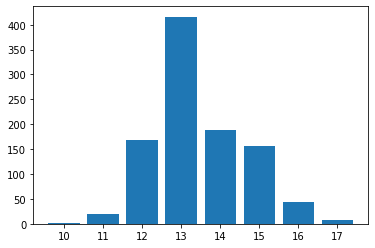

In [44]:
plt.bar(range(10,18),proj_df['Project'].groupby(proj_df['Project']).count())

Combining the distribution (the graph above) and the sample statistics of the project completion dates over the 1000 replications (output of the next cell), we can also see that the project completion time is right skewed, and that the worst case scenario is further away from the median than the best case scenario. In order to have a 95% chance of meeting the deadline, the quote should actually be around 15 as calculated below.

In [47]:
print(proj_df['Project'].describe())

count    1000.000000
mean       13.445000
std         1.171472
min        10.000000
25%        13.000000
50%        13.000000
75%        14.000000
max        17.000000
Name: Project, dtype: float64


In [45]:
np.percentile(proj_record,95)

15.049999999999955

## Scenario Two: Parallel Tasks

---

Now we have received new information that Task 2 and 3 can actually be conducted at the same time. With this update, the project completion time is now dependent on the task that gets completed later: `proj_time = t1_time + max(t2_time, t3_time)`. 

In [54]:
reps = 1000 # a variable specifying number of replications

t1_record = []
t2_record = []
t3_record = []

proj_record = []

t1_comp = [3, 2, 4]
t1_prob = [0.7, 0.1, 0.2]

t2_comp = [6, 5, 8]
t2_prob = [0.6, 0.2, 0.2]

t3_comp = [4, 3, 5]
t3_prob = [0.8, 0.05, 0.15]

for i in range(reps):
    t1_time = np.random.choice(t1_comp, 1, p=t1_prob)[0]
    t2_time = np.random.choice(t2_comp, 1, p=t2_prob)[0]
    t3_time = np.random.choice(t3_comp, 1, p=t3_prob)[0]
    
    proj_time = t1_time + max(t2_time, t3_time) #note the change here
    
    t1_record.append(t1_time)
    t2_record.append(t2_time)
    t3_record.append(t3_time)
    
    proj_record.append(proj_time)
    
proj_df = pd.DataFrame({"Task_1": t1_record,
                        "Task_2": t2_record, 
                        "Task_3": t3_record, 
                        "Project": proj_record})

proj_df.head()

,Task_1,Task_2,Task_3,Project
0,3,6,4,9
1,3,6,4,9
2,3,5,4,8
3,4,6,4,10
4,4,5,4,9


<BarContainer object of 6 artists>

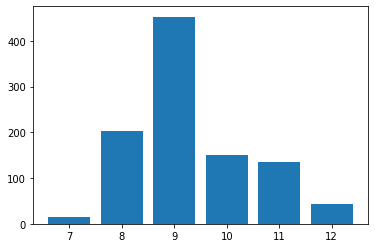

In [58]:
plt.bar(range(min(proj_record),max(proj_record)+1),proj_df['Project'].groupby(proj_df['Project']).count())

In [59]:
np.percentile(proj_record,95)

11.0

## Scenario Three: Correlated Task Risks

---

One would probably first think of correlation of coefficients when they first see correlated tasks. However, the number of correlation coefficients increases exponentially as the number of tasks increases, just like the possible combination of tasks (you can learn more about [combinations](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:prob-comb/x9e81a4f98389efdf:combinations/v/combination-formula) and [permutations](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:prob-comb/x9e81a4f98389efdf:combinatorics-precalc/v/permutation-formula) on Khan Academy), not to mention the amount of work that has to first go into deciding the relationships between thoses tasks. At the same time, correlation coefficients are mathematical concepts which do not carry the most meaningful real-world interpretations, especially when a project manager tries to understand why the correlation in risks exist or how it could be managed. Therefore, more frequently, one would specify a risk event that could potentially immpact multiple tasks and the probability of the risk event; one could also speicify a risk factor, which would again affect multiple tasks.

For now, let's go back to the assumption that the three tasks are sequential. In this scenario, the weather would have an impact on all three tasks, while internal communication would affect Task 2 and 3. By modeling the probability of risk events and factors, we would get the following equation:

\begin{equation}
\begin{split}
& Project\:Completion\:Time\\
=\: & Weather + Task_{1}\:Completion\:Time + Communication\:Factor * (Task_{2}\:Completion\:Time + Task_{3}\:Completion\:Time)
\end{split}
\end{equation}

## Reference

---